In [7]:
import rd_model
import pandas as pd
import itertools

Categorical Scenario Options:  
  
* Gov't Policy ("policy"):
  * 'NONE', 'INDISC-CONC','TARG-CONC', 'INDISC-REPR', 'TARG-REPR'
* Gov't Reactivity Level ("reactive_lvl"):
  * 'high', 'mid-high', 'mid-low', 'low', 'none'
* Agent Discontent ("discontent"):
  * 'high', 'mid', 'low'

### Sample running single simulation with mid-way shift

In [2]:
scenario = rd_model.CounterterrorismModel(N=200, height=3,width=4,prob_violence=0.0001,\
    policy='NONE',reactive_lvl='low',discontent='low',add_violence_aftermath=10, \
    crowding_threshold=30, agent_birth_rate=0.03, timestep_to_change=200, \
    change_prob_violence=0.0001, change_policy='CONC',change_reactive_lvl='none',change_discontent='mid',\
    change_add_violence_aftermath=10, change_crowding_threshold=30, change_agent_birth_rate=0.03)
for i in range(400):
    scenario.step()

Regime change! Policy shift underway at step 200 ... 



<AxesSubplot:>

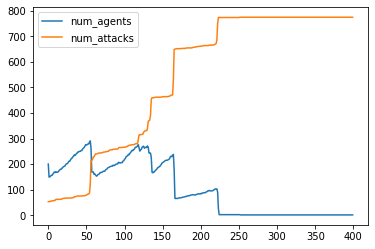

In [3]:
# show agents and attacks throughout model
model_df = scenario.datacollector.get_model_vars_dataframe()
model_df.plot()

In [6]:
agents_df = scenario.datacollector.get_agent_vars_dataframe()
nongovt_agents_df = agents_df[agents_df.status.isin(['anti-violence','combatant','neutral','sympathetic'])]
nongovt_agents_df

status agent_loc
Step AgentID                         
1    1          sympathetic    (1, 0)
     2          sympathetic    (1, 1)
     3        anti-violence    (2, 3)
     4              neutral    (2, 2)
     5        anti-violence    (1, 1)
...                     ...       ...
396  777            neutral    (1, 3)
397  777            neutral    (1, 3)
398  777            neutral    (1, 3)
399  777            neutral    (1, 3)
400  777            neutral    (1, 3)

[40188 rows x 2 columns]

In [5]:
govt_actions = scenario.datacollector.get_table_dataframe('govt_actions')
govt_actions

,step,govt_action,action_loc,violence_aftermath
0,1,INDISC-REPR,"(0, 0)",10
1,2,NONE,"(0, 0)",9
2,3,NONE,"(0, 0)",8
3,4,INDISC-CONC,"(0, 0)",10
4,5,INDISC-REPR,"(0, 0)",10
...,...,...,...,...
395,396,INDISC-CONC,"(0, 0)",0
396,397,NONE,"(0, 0)",0
397,398,INDISC-REPR,"(0, 0)",0
398,399,TARG-REPR,"(1, 2)",0


In [ ]:
# attacker deaths, not as relevant for analysis
scenario.datacollector.get_table_dataframe('Deaths')

### Running multiple simulations with mid-way shifts:

In [13]:
prob_violence = [0.0001, 0.0005, 0.001]
change_prob_violence = [0.0005, 0.00005, 0.0001]
govt_policy = ['NONE','CONC','REPR']
change_govt_policy = ['NONE','CONC','REPR']
reactive_lvl=['high','mid-high','mid-low','low','none']
change_reactive_lvl = ['high','mid-high','mid-low','low','none']
discontent = ['high','mid','low']
change_discontent = ['high','mid','low']
starting_population = [300]
grid_size = {200:(2,3),300:(3,3),400:(3,4),600:(4,5),\
                800:(5,5),1000:(5,6)}
steps = [400]

full_params = [prob_violence, change_prob_violence, govt_policy,change_govt_policy,\
                reactive_lvl,change_reactive_lvl, discontent, change_discontent,\
                starting_population,steps]
param_options = list(itertools.product(*full_params))

In [14]:
param_options[0:2]

[(0.0001, 0.0005, 'NONE', 'NONE', 'high', 'high', 'high', 'high', 300, 400),
 (0.0001, 0.0005, 'NONE', 'NONE', 'high', 'high', 'high', 'mid', 300, 400)]

In [16]:
results_dicts = []
for params in param_options[0:2]:
    return_dict = {'params':params}
    prob_violence, change_prob_violence, govt_policy,change_govt_policy,\
    reactive_lvl,change_reactive_lvl, discontent, change_discontent,\
    starting_population,steps = params
    height, width = grid_size[starting_population]
    model = rd_model.CounterterrorismModel(N=starting_population,height=height,\
                                            width=width,prob_violence=prob_violence,\
                                            policy=govt_policy,reactive_lvl=reactive_lvl,\
                                            discontent=discontent,change_prob_violence=change_prob_violence,\
                                            change_policy=change_govt_policy,\
                                            change_reactive_lvl=change_reactive_lvl,\
                                            change_discontent=change_discontent,
                                            timestep_to_change=round(steps / 2))
    for i in range(steps):
        model.step()

    model_df = model.datacollector.get_model_vars_dataframe()
    agents_df = model.datacollector.get_agent_vars_dataframe()
    deaths_df = model.datacollector.get_table_dataframe('Deaths')
    govt_actions_df = model.datacollector.get_table_dataframe('govt_actions')

    return_dict['deaths_df'] = deaths_df
    return_dict['model_df'] = model_df
    return_dict['agents_df'] = agents_df
    return_dict['govt_actions_df'] = govt_actions_df

    results_dicts.append(return_dict)


Regime change! Policy shift underway at step 200 ... 

Regime change! Policy shift underway at step 200 ... 



In [17]:
results_dicts

[{'params': (0.0001,
   0.0005,
   'NONE',
   'NONE',
   'high',
   'high',
   'high',
   'high',
   300,
   400),
  'deaths_df':      step  deaths
  0       1     152
  1       2       5
  2       3       0
  3       4      30
  4       5      36
  ..    ...     ...
  395   396       0
  396   397       0
  397   398       0
  398   399       0
  399   400       0
  
  [400 rows x 2 columns],
  'model_df':      num_agents  num_attacks
  0           300          152
  1           150          157
  2           145          157
  3           146          187
  4           117          223
  ..          ...          ...
  395           0          308
  396           0          308
  397           0          308
  398           0          308
  399           0          308
  
  [400 rows x 2 columns],
  'agents_df':                      status agent_loc
  Step AgentID                         
  1    1        anti-violence    (1, 0)
       2              neutral    (2, 2)
       3         